In [1]:
import matplotlib.pyplot as plt
import pandas
import numpy
import rba

from rbatools.rba_session import SessionRBA

from matplotlib.gridspec import GridSpec
import seaborn
from matplotlib.lines import Line2D


In [2]:
glucose_color="#2E4DA7"
oxygen_color="#DC5964"
acetate_color="#6DA7A4"
acetate_color="#158582"
acetate_color="#DDAA66"
growth_rate_color="#AAAABC"
contrast_line_color="#454555"
#dark_mud="#E6B327"
dark_mud="#FFE8AA"


In [3]:
title_font_size=18
ticklabel_fontsize=13
axislabel_fontsize=16
labelpad_axislables=0.5

In [4]:
Local_sensitivities=pandas.read_csv("LocalSensitivities_01.csv",index_col=0)
Local_sensitivities_001=pandas.read_csv("LocalSensitivities_all_enzymes_1percent.csv",index_col=0)



In [5]:
Local_sensitivities_001_nonzero=Local_sensitivities_001.query("Scaled_Sensitivity != 0")

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:64: UserWarning: This figure was using constrained_layout==True, but that is incompatible with subplots_adjust and or tight_layout: setting constrained_layout==False. 


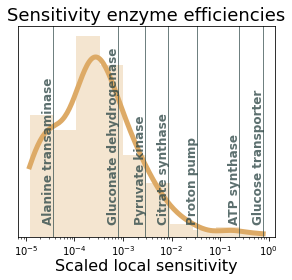

In [9]:
fig = plt.figure(figsize=(4,4),constrained_layout=True)
ax1 = fig.add_subplot(111)
seaborn.histplot(data=Local_sensitivities_001_nonzero, 
                     x="Scaled_Sensitivity",
                     ax=ax1,
                     alpha=0.3,
                     color=acetate_color, 
                     linewidth=0,
                     kde=True,
                     line_kws={"linewidth":5,"alpha":1,"color":"black"},
                     stat='count', 
                     #bins='auto',
                     bins=10,
                     #binrange=(-5,1),
                     fill=True,
                     log_scale=10,
                     label="Enzyme efficiencies")
trans = ax1.get_xaxis_transform()
#,weight="bold"
ax1.axvline(Local_sensitivities_001_nonzero.loc['TptsG_efficiency','Scaled_Sensitivity'],linestyle="solid",color="#324B4A",linewidth=1,alpha=0.7)
ax1.text(Local_sensitivities_001_nonzero.loc['TptsG_efficiency','Scaled_Sensitivity']*0.6,5,'Glucose transporter',rotation=90,color="#324B4A",fontsize=12,weight="bold",alpha=0.8)

ax1.axvline(Local_sensitivities_001_nonzero.loc['Eatp_efficiency','Scaled_Sensitivity'],linestyle="solid",color="#324B4A",linewidth=1,alpha=0.7)
ax1.text(Local_sensitivities_001_nonzero.loc['Eatp_efficiency','Scaled_Sensitivity']*0.6,5,'ATP synthase',rotation=90,color="#324B4A",fontsize=12,weight="bold",alpha=0.8)

ax1.axvline(Local_sensitivities_001_nonzero.loc['Epyk_enzyme_forward_efficiency','Scaled_Sensitivity'],linestyle="solid",color="#324B4A",linewidth=1,alpha=0.7)
ax1.text(Local_sensitivities_001_nonzero.loc['Epyk_enzyme_forward_efficiency','Scaled_Sensitivity']*0.6,5,'Pyruvate kinase',rotation=90,color="#324B4A",fontsize=12,weight="bold",alpha=0.8)

#ax1.axvline(Local_sensitivities_001_nonzero.loc['Tqox_enzyme_forward_efficiency','Scaled_Sensitivity'],linestyle="solid",color="#324B4A",linewidth=1,alpha=0.7)
#ax1.text(Local_sensitivities_001_nonzero.loc['Tqox_enzyme_forward_efficiency','Scaled_Sensitivity']*0.6,10,'Quinol oxidase',rotation=90,color="#324B4A",fontsize=12,weight="bold",alpha=0.8)

ax1.axvline(Local_sensitivities_001_nonzero.loc['Th_efficiency','Scaled_Sensitivity'],linestyle="solid",color="#324B4A",linewidth=1,alpha=0.7)
ax1.text(Local_sensitivities_001_nonzero.loc['Th_efficiency','Scaled_Sensitivity']*0.6,5,'Proton pump',rotation=90,color="#324B4A",fontsize=12,weight="bold",alpha=0.8)

ax1.axvline(Local_sensitivities_001_nonzero.loc['EcitZ_enzyme_forward_efficiency','Scaled_Sensitivity'],linestyle="solid",color="#324B4A",linewidth=1,alpha=0.7)
ax1.text(Local_sensitivities_001_nonzero.loc['EcitZ_enzyme_forward_efficiency','Scaled_Sensitivity']*0.6,5,'Citrate synthase',rotation=90,color="#324B4A",fontsize=12,weight="bold",alpha=0.8)

ax1.axvline(Local_sensitivities_001_nonzero.loc['Egnd_enzyme_forward_efficiency','Scaled_Sensitivity'],linestyle="solid",color="#324B4A",linewidth=1,alpha=0.7)
ax1.text(Local_sensitivities_001_nonzero.loc['Egnd_enzyme_forward_efficiency','Scaled_Sensitivity']*0.6,5,'Gluconate dehydrogenase',rotation=90,color="#324B4A",fontsize=12,weight="bold",alpha=0.8)

ax1.axvline(Local_sensitivities_001_nonzero.loc['EalaT_enzyme_forward_efficiency','Scaled_Sensitivity'],linestyle="solid",color="#324B4A",linewidth=1,alpha=0.7)
ax1.text(Local_sensitivities_001_nonzero.loc['EalaT_enzyme_forward_efficiency','Scaled_Sensitivity']*0.6,5,'Alanine transaminase',rotation=90,color="#324B4A",fontsize=12,weight="bold",alpha=0.8)

#EalaT
#EthiN

#ax1.axvline(Local_sensitivities_positive.loc['ribosome_capacity','Log_Scaled'],linestyle="dashed",color="red",label="Ribosome efficiency",linewidth=4)

#trans = ax2.get_xaxis_transform()
#ax2.axvline(abs(Local_sensitivities_negative.loc['maintenance_atp','Log_Scaled']),linestyle=(0, (3, 1, 1, 1)),color="limegreen",label="ATP maintenance target",linewidth=4)
#ax2.axvline(abs(Local_sensitivities_negative.loc['dna_concentration','Log_Scaled']),linestyle=(0, (1, 1)),color="navy",label="DNA-target",linewidth=3)
#ax2.axvline(abs(Local_sensitivities_negative.loc['mrna_concentration','Log_Scaled']),linestyle=(0, (3, 1, 1, 1, 1, 1)),color="darkorange",label="mRNA-target",linewidth=4)

#ax2.legend(frameon=False,loc='upper left')
#ax1.legend(fontsize=12, frameon=False,loc='upper right',labelspacing=0.3)
ax1.set_yticks([])
ax1.set_xlabel("Scaled local sensitivity",fontsize=axislabel_fontsize,labelpad=labelpad_axislables)
ax1.set_ylabel("")

ax1.set_title("Sensitivity enzyme efficiencies",fontsize=title_font_size)

#ax2 = fig.add_subplot(gs[4:, 0])

plt.tight_layout()
plt.savefig('Local_sensitivities_attempt_2_review.png')


In [ ]:
def plot_local_enzyme_sensitivities(ax,input_data):
    seaborn.histplot(data=input_data.query("Scaled_Sensitivity != 0"), 
                         x="Scaled_Sensitivity",
                         ax=ax,
                         alpha=0.3,
                         color=acetate_color, 
                         linewidth=0,
                         kde=True,
                         line_kws={"linewidth":5,"alpha":1,"color":"black"},
                         stat='count', 
                         bins=10,
                         fill=True,
                         log_scale=10,
                         label="Enzyme efficiencies")
    trans = ax.get_xaxis_transform()
    ax.axvline(Local_sensitivities_001_nonzero.loc['TptsG_efficiency','Scaled_Sensitivity'],linestyle="solid",color="#324B4A",linewidth=1,alpha=0.7)
    ax.text(Local_sensitivities_001_nonzero.loc['TptsG_efficiency','Scaled_Sensitivity']*0.6,5,'Glucose transporter',rotation=90,color="#324B4A",fontsize=12,weight="bold",alpha=0.8)

    ax.axvline(Local_sensitivities_001_nonzero.loc['Eatp_efficiency','Scaled_Sensitivity'],linestyle="solid",color="#324B4A",linewidth=1,alpha=0.7)
    ax.text(Local_sensitivities_001_nonzero.loc['Eatp_efficiency','Scaled_Sensitivity']*0.6,5,'ATP synthase',rotation=90,color="#324B4A",fontsize=12,weight="bold",alpha=0.8)

    ax.axvline(Local_sensitivities_001_nonzero.loc['Epyk_enzyme_forward_efficiency','Scaled_Sensitivity'],linestyle="solid",color="#324B4A",linewidth=1,alpha=0.7)
    ax.text(Local_sensitivities_001_nonzero.loc['Epyk_enzyme_forward_efficiency','Scaled_Sensitivity']*0.6,5,'Pyruvate kinase',rotation=90,color="#324B4A",fontsize=12,weight="bold",alpha=0.8)

    #ax.axvline(Local_sensitivities_001_nonzero.loc['Tqox_enzyme_forward_efficiency','Scaled_Sensitivity'],linestyle="solid",color="#324B4A",linewidth=1,alpha=0.7)
    #ax.text(Local_sensitivities_001_nonzero.loc['Tqox_enzyme_forward_efficiency','Scaled_Sensitivity']*0.6,10,'Quinol oxidase',rotation=90,color="#324B4A",fontsize=12,weight="bold",alpha=0.8)

    ax.axvline(Local_sensitivities_001_nonzero.loc['Th_efficiency','Scaled_Sensitivity'],linestyle="solid",color="#324B4A",linewidth=1,alpha=0.7)
    ax.text(Local_sensitivities_001_nonzero.loc['Th_efficiency','Scaled_Sensitivity']*0.6,5,'Proton pump',rotation=90,color="#324B4A",fontsize=12,weight="bold",alpha=0.8)

    ax.axvline(Local_sensitivities_001_nonzero.loc['EcitZ_enzyme_forward_efficiency','Scaled_Sensitivity'],linestyle="solid",color="#324B4A",linewidth=1,alpha=0.7)
    ax.text(Local_sensitivities_001_nonzero.loc['EcitZ_enzyme_forward_efficiency','Scaled_Sensitivity']*0.6,5,'Citrate synthase',rotation=90,color="#324B4A",fontsize=12,weight="bold",alpha=0.8)

    ax.axvline(Local_sensitivities_001_nonzero.loc['Egnd_enzyme_forward_efficiency','Scaled_Sensitivity'],linestyle="solid",color="#324B4A",linewidth=1,alpha=0.7)
    ax.text(Local_sensitivities_001_nonzero.loc['Egnd_enzyme_forward_efficiency','Scaled_Sensitivity']*0.6,5,'Gluconate dehydrogenase',rotation=90,color="#324B4A",fontsize=12,weight="bold",alpha=0.8)

    ax.axvline(Local_sensitivities_001_nonzero.loc['EalaT_enzyme_forward_efficiency','Scaled_Sensitivity'],linestyle="solid",color="#324B4A",linewidth=1,alpha=0.7)
    ax.text(Local_sensitivities_001_nonzero.loc['EalaT_enzyme_forward_efficiency','Scaled_Sensitivity']*0.6,5,'Alanine transaminase',rotation=90,color="#324B4A",fontsize=12,weight="bold",alpha=0.8)

    ax.set_yticks([])
    ax.set_xlabel("Scaled local sensitivity",fontsize=axislabel_fontsize,labelpad=labelpad_axislables)
    ax.set_ylabel("")

    ax.set_title("Sensitivity enzyme efficiencies",fontsize=title_font_size)